In [7]:
import pandas as pd
import stylia


def sample_compounds():
    df = pd.read_csv("018_aggregation_scores.csv")
    ik_pos = df.head(1000)["inchikey"]
    ik_neg = df.tail(1000)["inchikey"]
    df = pd.read_csv("012_pfalciparum_cleaned.csv")
    ik2smi = {}
    for v in df[["inchikey", "smiles"]].values:
        ik2smi[v[0]] = v[1]
    smi_pos = [ik2smi[ik] for ik in ik_pos]
    smi_neg = [ik2smi[ik] for ik in ik_neg]
    return smi_pos, smi_neg


smi_pos, smi_neg = sample_compounds()

with open("sample_pos.csv", "w") as f:
    f.write("smiles\n")
    for smi in smi_pos:
        f.write(smi + "\n")
with open("sample_neg.csv", "w") as f:
    f.write("smiles\n")
    for smi in smi_neg:
        f.write(smi + "\n")

In [8]:
dp = pd.read_csv("eos4zfy_pos.csv")
dn = pd.read_csv("eos4zfy_neg.csv")

/var/folders/gl/qqtyyls96rvdkjyk_03q18c00000gn/T/ipykernel_57998/3936987884.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(["Known actives", "Known inactives"])


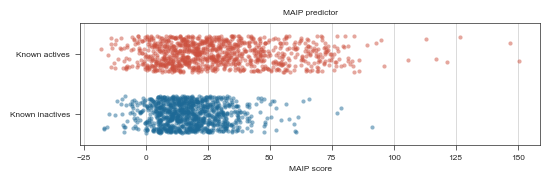

In [35]:
import seaborn as sns

import matplotlib.pyplot as plt

colors = stylia.colors.colors.NamedColors()

fig, axs = stylia.create_figure(1,1, width=stylia.TWO_COLUMNS_WIDTH/1.3, height=stylia.TWO_COLUMNS_WIDTH/4)
ax = axs.next()
sns.stripplot(x=dp["maip_score"], y=0, orient="h", color=colors.red, alpha=0.5, ax=ax, s=3, jitter=0.3)
sns.stripplot(x=dn["maip_score"], y=1, orient="h", color=colors.blue, alpha=0.5, ax=ax, s=3, jitter=0.3)
ax.set_yticklabels(["Known actives", "Known inactives"])
stylia.label(ax, title="MAIP predictor", xlabel="MAIP score", ylabel="")
plt.tight_layout()
stylia.save_figure("maip_scores.pdf")


(array([ 18.,  97., 357., 313., 159.,  34.,  12.,   6.,   2.,   1.]),
 array([-16.97389323,  -6.1420086 ,   4.68987603,  15.52176067,
         26.3536453 ,  37.18552993,  48.01741456,  58.84929919,
         69.68118382,  80.51306845,  91.34495308]),
 <BarContainer object of 10 artists>)

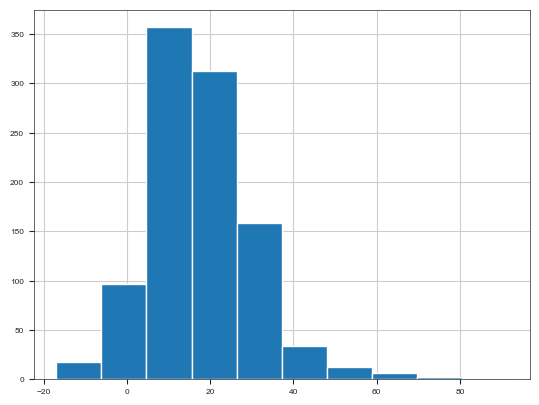

In [11]:
plt.hist(dn["maip_score"])